In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url,sep=',')
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [3]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df.info()
df['hour_beginning'].head(5)

/tmp/ipykernel_4775/168648140.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hour_beginning     16057 non-null  datetime64[ns]
 1   location           16057 non-null  object        
 2   Pedestrians        16057 non-null  int64         
 3   Towards Manhattan  16057 non-null  int64         
 4   Towards Brooklyn   16057 non-null  int64         
 5   weather_summary    16041 non-null  object        
 6   temperature        16041 non-null  float64       
 7   precipitation      16041 non-null  float64       
 8   lat                16057 non-null  float64       
 9   long               16057 non-null  float64       
 10  events             1124 non-null   object        
 11  Location1          16057 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 1.5+ MB


0   2019-04-30 00:00:00
1   2019-12-31 22:00:00
2   2019-12-31 23:00:00
3   2019-12-31 21:00:00
4   2019-04-01 03:00:00
Name: hour_beginning, dtype: datetime64[ns]

In [4]:
df['hour'] = df['hour_beginning'].dt.hour
df['month'] = df['hour_beginning'].dt.month
df['date'] = df['hour_beginning'].dt.date
df['day_name'] = df['hour_beginning'].dt.day_name()

df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,4,2019-04-30,Tuesday
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",22,12,2019-12-31,Tuesday
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",23,12,2019-12-31,Tuesday
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",21,12,2019-12-31,Tuesday
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,4,2019-04-01,Monday


##### Check whether data is complete

In [5]:
df.isnull().sum()

hour_beginning           0
location                 0
Pedestrians              0
Towards Manhattan        0
Towards Brooklyn         0
weather_summary         16
temperature             16
precipitation           16
lat                      0
long                     0
events               14933
Location1                0
hour                     0
month                    0
date                     0
day_name                 0
dtype: int64

In [6]:
df.loc[df.temperature.isnull()]   #Return values where temp is null

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,4,2019-04-30,Tuesday
482,2019-01-06 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-06,Sunday
701,2019-11-03 01:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,Daylight Saving Time ends,"(40.7081639691088, -73.9995087014816)",1,11,2019-11-03,Sunday
2140,2019-01-14 00:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-14,Monday
2604,2019-01-09 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-09,Wednesday
2944,2019-03-10 02:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,Daylight Saving Time starts,"(40.7081639691088, -73.9995087014816)",2,3,2019-03-10,Sunday
3951,2019-01-16 00:00:00,Brooklyn Bridge,7,2,5,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-16,Wednesday
4198,2019-05-02 00:00:00,Brooklyn Bridge,3,2,1,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,5,2019-05-02,Thursday
5206,2019-09-17 00:00:00,Brooklyn Bridge,2,2,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,9,2019-09-17,Tuesday
5277,2019-06-17 01:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,6,2019-06-17,Monday


In [7]:
# get beginning and end of date range
min_dt = df.hour_beginning.min()
max_dt = df.hour_beginning.max()
print(min_dt)
print(max_dt)


2017-10-01 00:00:00
2019-12-31 23:00:00


In [8]:
expected_range = pd.date_range(start = min_dt, end = max_dt, freq='h' )
expected_range

DatetimeIndex(['2017-10-01 00:00:00', '2017-10-01 01:00:00',
               '2017-10-01 02:00:00', '2017-10-01 03:00:00',
               '2017-10-01 04:00:00', '2017-10-01 05:00:00',
               '2017-10-01 06:00:00', '2017-10-01 07:00:00',
               '2017-10-01 08:00:00', '2017-10-01 09:00:00',
               ...
               '2019-12-31 14:00:00', '2019-12-31 15:00:00',
               '2019-12-31 16:00:00', '2019-12-31 17:00:00',
               '2019-12-31 18:00:00', '2019-12-31 19:00:00',
               '2019-12-31 20:00:00', '2019-12-31 21:00:00',
               '2019-12-31 22:00:00', '2019-12-31 23:00:00'],
              dtype='datetime64[ns]', length=19728, freq='h')

In [9]:
# then identify the missing hours
missing_hours = expected_range.difference(df['hour_beginning'])
print(missing_hours)
df.shape

# data seems to be missing samples from August 2018 through December 2018

DatetimeIndex(['2018-08-01 00:00:00', '2018-08-01 01:00:00',
               '2018-08-01 02:00:00', '2018-08-01 03:00:00',
               '2018-08-01 04:00:00', '2018-08-01 05:00:00',
               '2018-08-01 06:00:00', '2018-08-01 07:00:00',
               '2018-08-01 08:00:00', '2018-08-01 09:00:00',
               ...
               '2018-12-31 14:00:00', '2018-12-31 15:00:00',
               '2018-12-31 16:00:00', '2018-12-31 17:00:00',
               '2018-12-31 18:00:00', '2018-12-31 19:00:00',
               '2018-12-31 20:00:00', '2018-12-31 21:00:00',
               '2018-12-31 22:00:00', '2018-12-31 23:00:00'],
              dtype='datetime64[ns]', length=3672, freq='h')


(16057, 16)

In [10]:
df = df.sort_values(by='hour_beginning') 
#Arranging data in chronological order first and then proceeding to forward/back fill
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
8846,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,10,2017-10-01,Sunday
9473,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,10,2017-10-01,Sunday
10098,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,10,2017-10-01,Sunday
10733,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,10,2017-10-01,Sunday
11527,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,10,2017-10-01,Sunday


In [11]:
df.reset_index(drop=True, inplace=True)  #drop=True discards the current index, inplace=True applies changes to the df
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
0,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,10,2017-10-01,Sunday
1,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,10,2017-10-01,Sunday
2,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,10,2017-10-01,Sunday
3,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,10,2017-10-01,Sunday
4,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,10,2017-10-01,Sunday


In [12]:
df.weather_summary.value_counts()

weather_summary
clear-night            3750
partly-cloudy-day      3169
clear-day              3127
partly-cloudy-night    2503
cloudy                 2377
rain                    920
snow                     93
fog                      76
sleet                    14
wind                     12
Name: count, dtype: int64

In [13]:
df.describe()

,hour_beginning,Pedestrians,Towards Manhattan,Towards Brooklyn,temperature,precipitation,lat,long,hour,month
count,16057,16057.000000,16057.000000,16057.000000,16041.000000,16041.000000,1.605700e+04,1.605700e+04,16057.000000,16057.000000
mean,2018-11-22 23:25:25.913931776,687.106309,334.772436,352.286853,53.213952,0.004617,4.070816e+01,-7.399951e+01,11.499346,6.347076
min,2017-10-01 00:00:00,0.000000,0.000000,0.000000,2.000000,0.000000,4.070816e+01,-7.399951e+01,0.000000,1.000000
25%,2018-03-17 06:00:00,16.000000,9.000000,5.000000,39.000000,0.000000,4.070816e+01,-7.399951e+01,5.000000,3.000000
50%,2019-01-31 12:00:00,227.000000,112.000000,111.000000,53.000000,0.000000,4.070816e+01,-7.399951e+01,11.000000,6.000000
75%,2019-07-17 18:00:00,1254.000000,611.000000,632.000000,69.000000,0.000000,4.070816e+01,-7.399951e+01,17.000000,10.000000
max,2019-12-31 23:00:00,4330.000000,3657.000000,2872.000000,97.000000,0.680400,4.070816e+01,-7.399951e+01,23.000000,12.000000
std,NaN,862.244605,417.807545,456.624509,18.036800,0.023400,1.421130e-14,2.842259e-14,6.922682,3.544812


In [14]:
df.groupby('weather_summary')['precipitation'].describe()  
#It computes summary statistics for the 'precipitation' values within each group.

,count,mean,std,min,25%,50%,75%,max
weather_summary,,,,,,,,
clear-day,3127.0,0.000235,0.001193,0.0000,0.000000,0.0000,0.000000,0.0241
clear-night,3750.0,0.000055,0.000455,0.0000,0.000000,0.0000,0.000000,0.0157
cloudy,2377.0,0.001705,0.005104,0.0000,0.000000,0.0000,0.000500,0.1090
fog,76.0,0.003432,0.005740,0.0000,0.000000,0.0009,0.003650,0.0246
partly-cloudy-day,3169.0,0.000839,0.002985,0.0000,0.000000,0.0000,0.000000,0.0480
partly-cloudy-night,2503.0,0.000906,0.003623,0.0000,0.000000,0.0000,0.000000,0.1000
rain,920.0,0.065898,0.071727,0.0006,0.025500,0.0433,0.080150,0.6804
sleet,14.0,0.061729,0.066759,0.0089,0.029025,0.0399,0.056975,0.2284
snow,93.0,0.025419,0.030711,0.0013,0.011500,0.0168,0.026700,0.2029


### 1. Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
0,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,10,2017-10-01,Sunday
1,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,10,2017-10-01,Sunday
2,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,10,2017-10-01,Sunday
3,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,10,2017-10-01,Sunday
4,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,10,2017-10-01,Sunday


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
24,2017-10-02 00:00:00,Brooklyn Bridge,60,20,40,clear-night,53.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,10,2017-10-02,Monday
25,2017-10-02 01:00:00,Brooklyn Bridge,27,15,12,clear-night,52.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,10,2017-10-02,Monday
26,2017-10-02 02:00:00,Brooklyn Bridge,6,3,3,clear-night,51.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,10,2017-10-02,Monday
27,2017-10-02 03:00:00,Brooklyn Bridge,8,5,3,clear-night,50.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,10,2017-10-02,Monday
28,2017-10-02 04:00:00,Brooklyn Bridge,2,0,2,clear-night,49.0,0.0,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,10,2017-10-02,Monday


<Axes: xlabel='day_name'>

Text(0.5, 1.0, 'Weekday Pedestrian Counts (Mon–Fri)')

Text(0.5, 0, 'Day of Week')

Text(0, 0.5, 'Total Pedestrians')

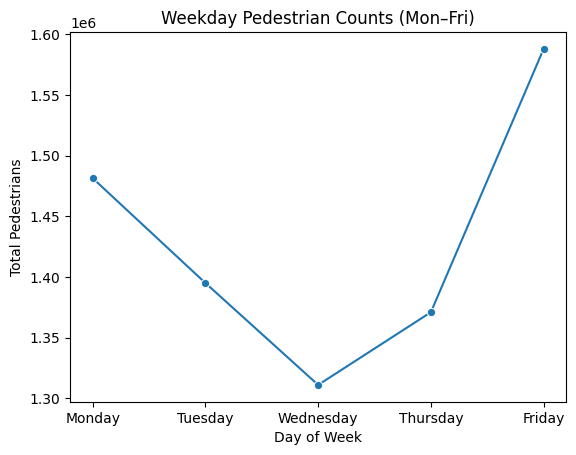

In [15]:
df.head()

# exclude weekends
df_weekdays = df[~df["day_name"].isin(["Saturday", "Sunday"])]
df_weekdays.head()

weekday_counts = df_weekdays.groupby("day_name")["Pedestrians"].sum()
# The result of df_weekdays.groupby("day_name") is a GroupBy object 
# — a special intermediate container that allows you to apply operations 
# (like sum, mean, count) to each group separately.

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
weekday_counts = weekday_counts.reindex(weekday_order)
# .rename() changes the labels themselves, while
# .reindex() only reorders or aligns data according to a given list.

# when data is Series, don't pass it to data= when call lineplot. only pass dataframe
sns.lineplot(x=weekday_counts.index, y=weekday_counts.values, marker='o')
plt.title("Weekday Pedestrian Counts (Mon–Fri)")
plt.xlabel("Day of Week")
plt.ylabel("Total Pedestrians")
plt.show()

### 2. Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

In [16]:
df.head()
df[df["weather_summary"].isnull()]

# Given the temporal nature of the data and 
# the relatively slow changes in the weather variable over time
# Now we can fill in missing data with forward/back fill method
df_ffilled = df.copy()

df_ffilled["weather_summary"] = df_ffilled["weather_summary"].ffill()

# forward-fill missing values (NaN) in just the "weather_summary" colum
df_ffilled.isnull().sum()


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
0,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,10,2017-10-01,Sunday
1,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,10,2017-10-01,Sunday
2,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,10,2017-10-01,Sunday
3,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,10,2017-10-01,Sunday
4,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,10,2017-10-01,Sunday


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
3866,2018-03-11 02:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,Daylight Saving Time starts,"(40.7081639691088, -73.9995087014816)",2,3,2018-03-11,Sunday
5376,2018-05-13 00:00:00,Brooklyn Bridge,98,69,29,NaN,NaN,NaN,40.708164,-73.999509,Mother's Day,"(40.7081639691088, -73.9995087014816)",0,5,2018-05-13,Sunday
7416,2019-01-06 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-06,Sunday
7488,2019-01-09 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-09,Wednesday
7608,2019-01-14 00:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-14,Monday
7656,2019-01-16 00:00:00,Brooklyn Bridge,7,2,5,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-16,Wednesday
8064,2019-02-02 00:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,2,2019-02-02,Saturday
8808,2019-03-05 00:00:00,Brooklyn Bridge,2,0,2,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,3,2019-03-05,Tuesday
8930,2019-03-10 02:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,Daylight Saving Time starts,"(40.7081639691088, -73.9995087014816)",2,3,2019-03-10,Sunday
10152,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,4,2019-04-30,Tuesday


hour_beginning           0
location                 0
Pedestrians              0
Towards Manhattan        0
Towards Brooklyn         0
weather_summary          0
temperature             16
precipitation           16
lat                      0
long                     0
events               14933
Location1                0
hour                     0
month                    0
date                     0
day_name                 0
dtype: int64

<Figure size 1500x1000 with 0 Axes>

<Axes: xlabel='weather_summary', ylabel='Pedestrians'>

Text(0.5, 1.0, 'Mean value of Pedestrians counts vs. Weather Condition')

Text(0.5, 0, 'Weather Conditions')

Text(0, 0.5, 'Mean Value of Pedestrians Counts')

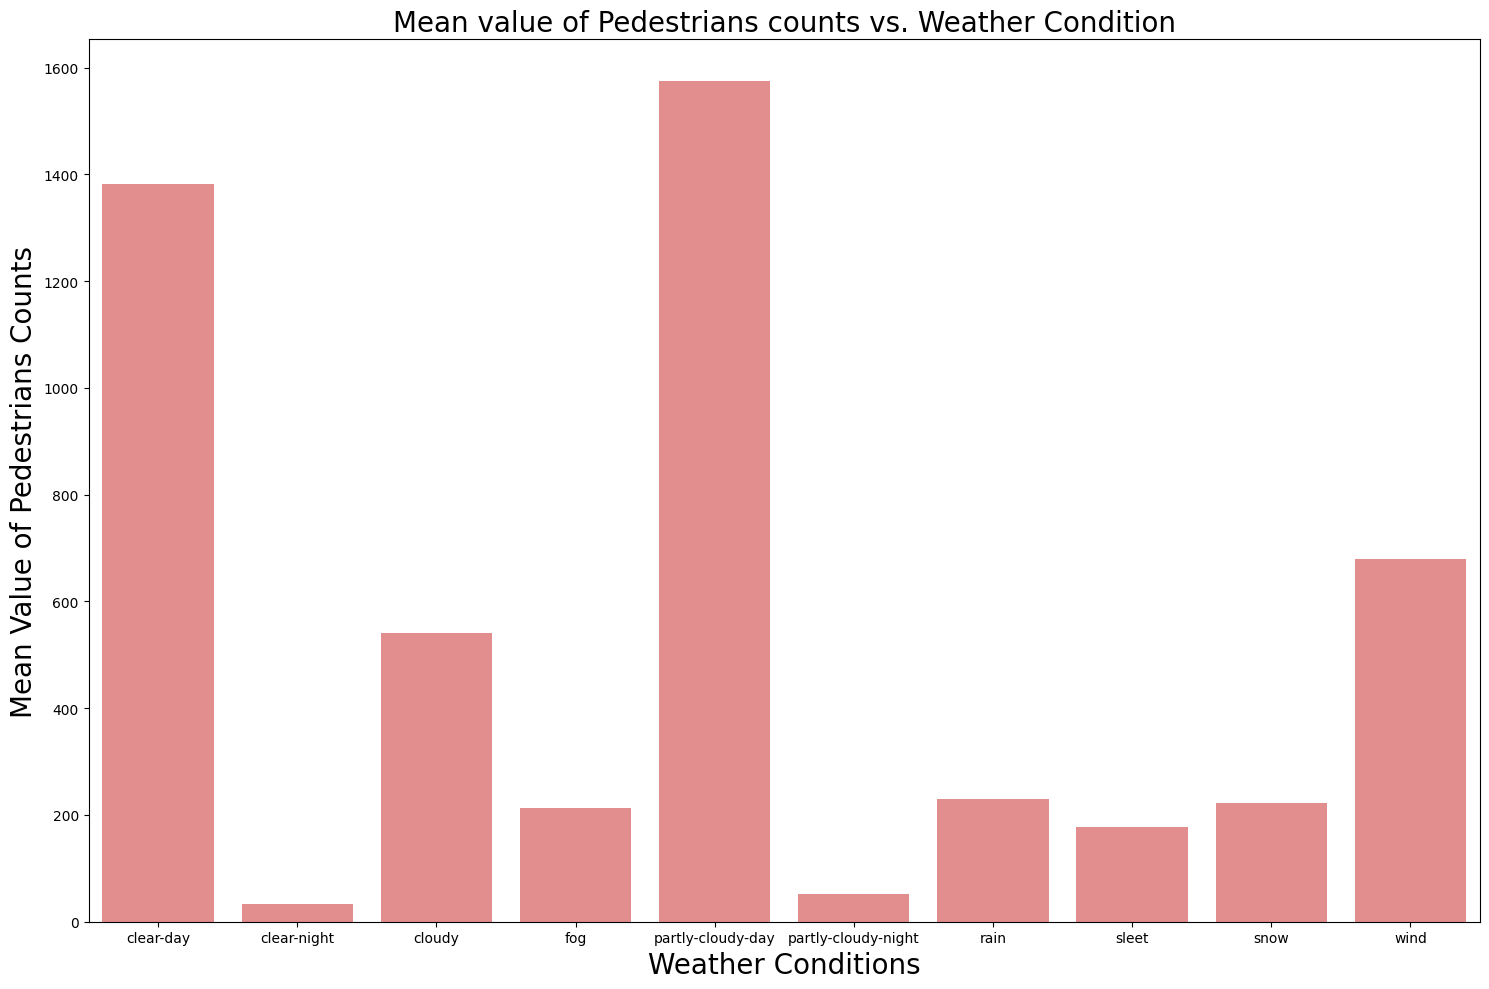

In [17]:
df_2019 = df_ffilled[df_ffilled["hour_beginning"].dt.year == 2019]
ped_mean = df_2019.groupby("weather_summary")["Pedestrians"].mean().round(1)
ped_mean_df = ped_mean.reset_index() # convert to a dataframe

plt.figure(figsize=(15, 10))
sns.barplot(x="weather_summary", y="Pedestrians", data=ped_mean_df, color='lightcoral')
plt.title("Mean value of Pedestrians counts vs. Weather Condition", fontsize = 20)
plt.xlabel("Weather Conditions", fontsize = 20)
plt.ylabel("Mean Value of Pedestrians Counts", fontsize = 20)
plt.tight_layout()  # adjusts spacing to avoid clipping

plt.show()

##### It's hard to draw a correlation matrix between weather conditions and mean value of pedestrian counts because weather conditions are categorical data. But from this bar graph, we can clearly see, weathers like partly cloudy or clear day would have much more pedestrians compared to rainy day and pedestrians in daytime is more than night

### 3. Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

In [18]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour'].apply(time_of_day)
summary = df.groupby('time_of_day')['Pedestrians'].mean().sort_values()
print(summary)


time_of_day
Night          50.086680
Morning       529.699338
Evening       908.873318
Afternoon    1749.484305
Name: Pedestrians, dtype: float64


<Axes: xlabel='time_of_day'>

Text(0.5, 1.0, 'Average Pedestrian Activity by Time of Day')

Text(0, 0.5, 'Average Pedestrian Count')

Text(0.5, 0, 'Time of Day')

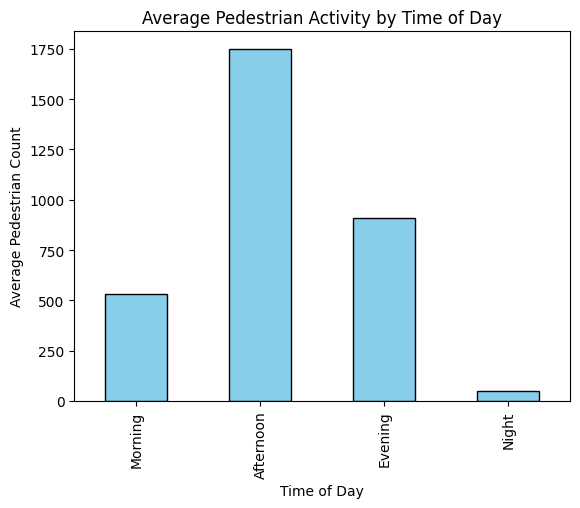

In [19]:
df.groupby('time_of_day')['Pedestrians'].mean().reindex(
    ['Morning', 'Afternoon', 'Evening', 'Night']
).plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Pedestrian Activity by Time of Day')
plt.ylabel('Average Pedestrian Count')
plt.xlabel('Time of Day')
plt.show()
